Initial Setup and Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/"


/content/drive/MyDrive/Colab Notebooks


In [4]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/.git/


In [5]:
!mv "NLP Phase 1.ipynb" /content/drive/MyDrive/Colab\ Notebooks/

mv: 'NLP Phase 1.ipynb' and '/content/drive/MyDrive/Colab Notebooks/NLP Phase 1.ipynb' are the same file


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import re
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

os.environ['NLTK_DATA'] = '/usr/share/nltk_data/'
!mkdir -p /usr/share/nltk_data
nltk.download('punkt_tab', download_dir='/usr/share/nltk_data')
nltk.download('all', download_dir='/usr/share/nltk_data')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perce

True

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/UPHILL.csv'
df = pd.read_csv(file_path)

print(f"\n=== Dataset Summary ===\n"
      f"Rows: {df.shape[0]:,}\n"
      f"Columns: {df.shape[1]}\n")
print("=== First 3 Rows ===")
print(df.head(3).to_string(index=False, max_colwidth=30))
print("\n" + "-"*50)

print("\n=== Last 3 Rows ===")
print(df.tail(3).to_string(index=False, max_colwidth=30))



=== Dataset Summary ===
Rows: 115,870
Columns: 18

=== First 3 Rows ===
claim_id                          claim claim_veracity           veracity_explanation       subjects   date_published source_db fact_checkers                      main_text sources presupposition_level      query_with_presupposition conversational_model  response_num query_response_id                 model_response entailment_prediction           prediction_reasoning
 10009_p Extra calcium, vitamin D no...           true This was a very clean and e... reuters health January 27, 2011 pubhealth               It is rare to see a story i...                      Neutral I'm interested in learning ...     text-davinci-002             0     10009_p##0##0 \n\nThere are many factors ...                 agree The evidence agrees with th...
 10009_p Extra calcium, vitamin D no...           true This was a very clean and e... reuters health January 27, 2011 pubhealth               It is rare to see a story i...               

In [ ]:

# Define the column explanations
column_explanations = {
    'claim_id': 'Unique identifier for each health claim',
    'claim': 'Text of the health claim being fact-checked',
    'claim_veracity': 'Ground truth label (true/false/mixture/fabricated)',
    'veracity_explanation': 'Detailed explanation from fact-checkers supporting the veracity judgment',
    'subjects': 'Topics/categories the claim belongs to (e.g., medical, COVID-19)',
    'date_published': 'When the claim was originally published',
    'source_db': 'Source database (pubhealth/monant/fabricated)',
    'fact_checkers': 'Names of organizations/individuals who fact-checked the claim',
    'main_text': 'Detailed fact-checking article text',
    'sources': 'References/citations used in fact-checking',
    'presupposition_level': 'How strongly the claim assumes truth (Neutral/Mild/Unequivocal)',
    'entailment_prediction': 'Whether evidence supports the claim (agree/disagree/neutral)'
}

# Print the formatted output
print("\n\033[1mKEY COLUMNS IN UPHILL DATASET\033[0m")
print("-" * 50)
for col, explanation in column_explanations.items():
    print(f"\033[1m{col:<25}\033[0m {explanation}")
print("-" * 50)
print(f"\nDataset contains {len(df.columns)} total columns ({len(column_explanations)} key columns shown)")


KEY COLUMNS IN UPHILL DATASET
--------------------------------------------------
claim_id                  Unique identifier for each health claim
claim                     Text of the health claim being fact-checked
claim_veracity            Ground truth label (true/false/mixture/fabricated)
veracity_explanation      Detailed explanation from fact-checkers supporting the veracity judgment
subjects                  Topics/categories the claim belongs to (e.g., medical, COVID-19)
date_published            When the claim was originally published
source_db                 Source database (pubhealth/monant/fabricated)
fact_checkers             Names of organizations/individuals who fact-checked the claim
main_text                 Detailed fact-checking article text
sources                   References/citations used in fact-checking
presupposition_level      How strongly the claim assumes truth (Neutral/Mild/Unequivocal)
entailment_prediction     Whether evidence supports the claim (agree

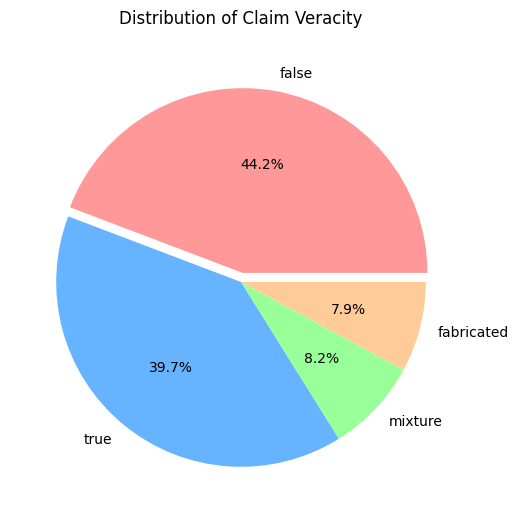

In [ ]:
#Shows class imbalance at a glance
# Prepare data
veracity_counts = df['claim_veracity'].value_counts()

# Plot
plt.figure(figsize=(8,6))
veracity_counts.plot(kind='pie', autopct='%1.1f%%',
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                    explode=(0.05, 0, 0, 0))
plt.title('Distribution of Claim Veracity', pad=20)
plt.ylabel('')
plt.show()

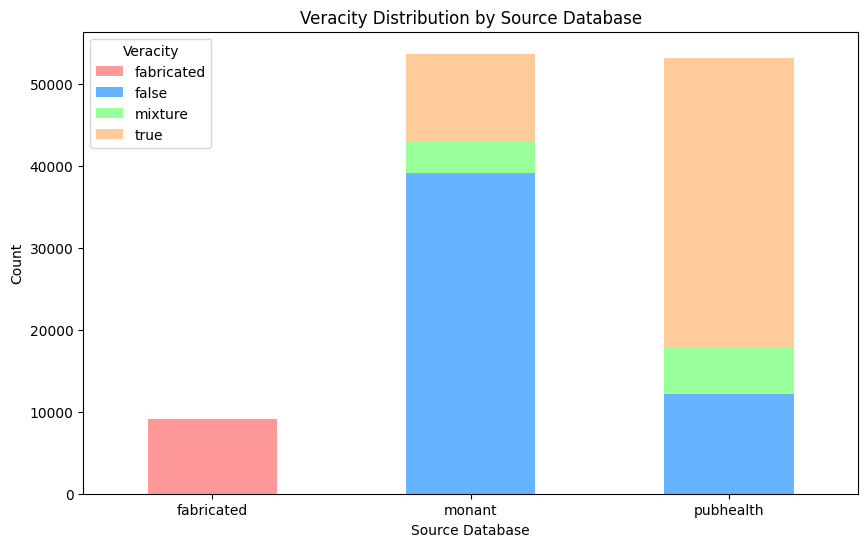

In [ ]:
#source_db vs claim_veracity
#Reveals if certain sources have more false claims.
# Cross-tabulation
ct = pd.crosstab(df['source_db'], df['claim_veracity'])

# Plot
ct.plot(kind='bar', stacked=True, figsize=(10,6),
       color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Veracity Distribution by Source Database')
plt.xlabel('Source Database')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Veracity')
plt.show()

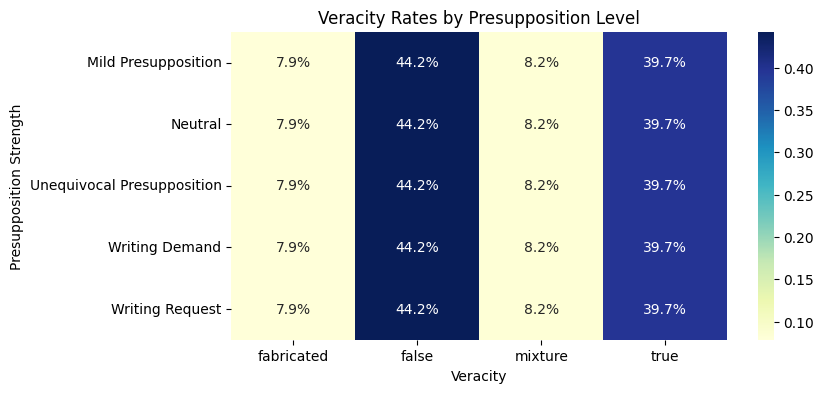

In [ ]:
# Prepare data
# Shows how claim phrasing affects truthfulness.
presup_heatmap = pd.crosstab(df['presupposition_level'],
                            df['claim_veracity'],
                            normalize='index')

# Plot
plt.figure(figsize=(8,4))
sns.heatmap(presup_heatmap, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('Veracity Rates by Presupposition Level')
plt.xlabel('Veracity')
plt.ylabel('Presupposition Strength')
plt.show()

Secure preprocessing

In [ ]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return ' '.join(words)

df['clean_claim'] = df['claim'].apply(preprocess_text)
df['target'] = df['claim_veracity'].apply(lambda x: 1 if x == 'true' else 0)

Train Test Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_claim'],
    df['target'],
    test_size=0.3,
    random_state=42,
    stratify=df['target']
)

Feature Engineering (Tf-IDF Vectorization)

In [ ]:
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Model Training

In [ ]:
def train_and_evaluate(model, model_name):
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.2%}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return accuracy


Logistic Regression Accuracy: 96.01%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     20973
           1       0.95      0.95      0.95     13788

    accuracy                           0.96     34761
   macro avg       0.96      0.96      0.96     34761
weighted avg       0.96      0.96      0.96     34761



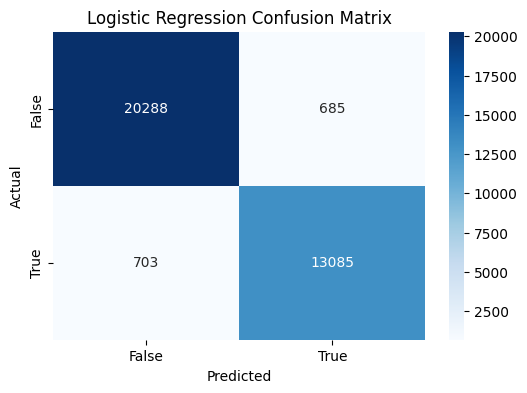


Random Forest Accuracy: 62.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76     20973
           1       1.00      0.06      0.11     13788

    accuracy                           0.63     34761
   macro avg       0.81      0.53      0.43     34761
weighted avg       0.77      0.63      0.50     34761



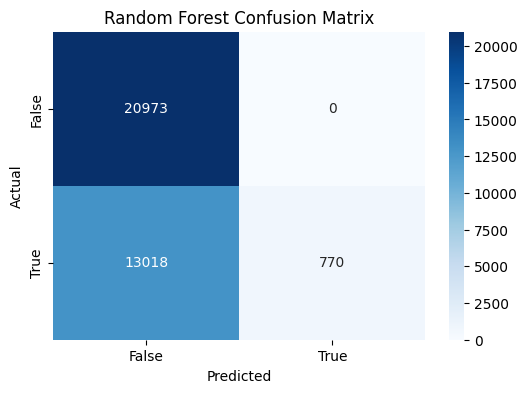


Linear SVM Accuracy: 98.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20973
           1       0.98      0.98      0.98     13788

    accuracy                           0.98     34761
   macro avg       0.98      0.98      0.98     34761
weighted avg       0.98      0.98      0.98     34761



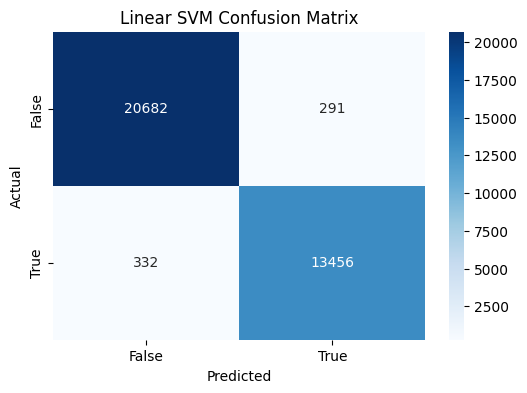

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Linear SVM": LinearSVC(random_state=42)
}

# Evaluate all models
results = {}
for name, model in models.items():
    results[name] = train_and_evaluate(model, name)

Sample Predictions

In [ ]:
def predict_claim(text, model):
    cleaned = preprocess_text(text)
    vectorized = tfidf.transform([cleaned])
    pred = model.predict(vectorized)[0]
    return "True" if pred == 1 else "False"

sample_claims = [
    "Vitamin D prevents all diseases",
    "Exercise improves cardiovascular health",
    "5G towers spread viruses"
]

print("\nSample Predictions:")
for claim in sample_claims:
    print(f"\nClaim: {claim}")
    for name, model in models.items():
        print(f"{name}: {predict_claim(claim, model)}")


Sample Predictions:

Claim: Vitamin D prevents all diseases
Logistic Regression: False
Random Forest: False
Linear SVM: False

Claim: Exercise improves cardiovascular health
Logistic Regression: True
Random Forest: True
Linear SVM: True

Claim: 5G towers spread viruses
Logistic Regression: False
Random Forest: False
Linear SVM: False


ROC Curve Visualization

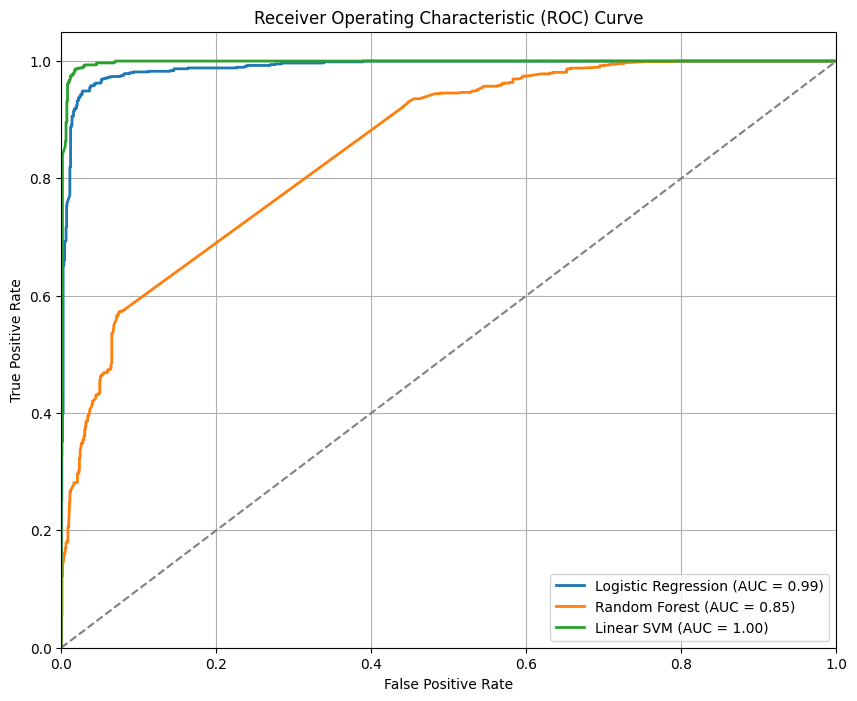

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get predicted probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_tfidf)[:, 1]
    elif hasattr(model, "decision_function"):  # For LinearSVC
        y_proba = model.decision_function(X_test_tfidf)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Scale to [0,1]
    else:
        continue

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, lw=2,
             label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Table comparing all models
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [f"{acc:.2%}" for acc in results.values()],
    'Precision (True)': [classification_report(y_test, m.predict(X_test_tfidf), output_dict=True)['1']['precision']
                         for m in models.values()],
    'Recall (True)': [classification_report(y_test, m.predict(X_test_tfidf), output_dict=True)['1']['recall']
                      for m in models.values()]
}).set_index('Model')

print(results_df)

                    Accuracy  Precision (True)  Recall (True)
Model                                                        
Logistic Regression   96.01%          0.950254       0.949014
Random Forest         62.55%          1.000000       0.055846
Linear SVM            98.21%          0.978832       0.975921
